## Name: Atharva Jibhakate
### TY BTech CSE (Panel B)
### Roll No.: PB16


Importing Libraries

In [2]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
'''
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from geopy.geocoders import Nominatim
import math
'''

'\nfrom mpl_toolkits.basemap import Basemap as Basemap\nfrom matplotlib.colors import rgb2hex\nfrom matplotlib.patches import Polygon\nfrom geopy.geocoders import Nominatim\nimport math\n'

Loading Dataset into Pandas Dataframe

In [3]:
melb_data = pd.read_csv("melb_data.csv")

In [4]:
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
melb_data.shape

(13580, 21)

In [9]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Handling Missing Values

In [10]:
melb_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [11]:
melb_data.dropna(inplace=True)

In [12]:
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [13]:
melb_data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

Data Transformation:
Transforming into Integer, Categorical and Date datatypes

In [15]:
melb_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [33]:
melb_data['Suburb'].astype('category').describe()

count          6196
unique          287
top       Reservoir
freq            154
Name: Suburb, dtype: object

In [45]:
melb_data['Suburb'] = melb_data['Suburb'].astype('category')
melb_data['Rooms'] = melb_data['Rooms'].astype('category')
melb_data['Type'] = melb_data['Type'].astype('category')
melb_data['Method'] = melb_data['Method'].astype('category')
melb_data['CouncilArea'] = melb_data['CouncilArea'].astype('category')
melb_data['Regionname'] = melb_data['Regionname'].astype('category')
melb_data['Date'] = melb_data['Date'].astype('datetime64[ns]')
melb_data['Postcode'] = melb_data['Postcode'].astype("int64")
melb_data['Bedroom2'] = melb_data['Bedroom2'].astype("int64")
melb_data['Bathroom'] = melb_data['Bathroom'].astype("int64")
melb_data['Car'] = melb_data['Car'].astype('int64')

In [47]:
melb_data.dtypes

Suburb                 category
Address                  object
Rooms                  category
Type                   category
Price                   float64
Method                 category
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                  int64
Bedroom2                  int64
Bathroom                  int64
Car                       int64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea            category
Lattitude               float64
Longtitude              float64
Regionname             category
Propertycount           float64
dtype: object

Checking Duplicates

In [48]:
melb_data.duplicated().sum()

0

In [49]:
melb_data.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067,2,1,0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067,3,2,0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067,3,1,2,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,3067,4,2,0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10,2.5,3067,2,1,2,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,2016-08-10,2.5,3067,3,1,2,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0
11,Abbotsford,40 Nicholson St,3,h,1350000.0,VB,Nelson,2016-12-11,2.5,3067,3,2,2,214.0,190.0,2005.0,Yarra,-37.8085,144.9964,Northern Metropolitan,4019.0
12,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,2016-12-11,2.5,3067,2,2,1,0.0,94.0,2009.0,Yarra,-37.8078,144.9965,Northern Metropolitan,4019.0
15,Abbotsford,16 William St,2,h,1310000.0,S,Jellis,2016-10-15,2.5,3067,2,1,2,238.0,97.0,1890.0,Yarra,-37.8090,144.9976,Northern Metropolitan,4019.0
16,Abbotsford,42 Henry St,3,h,1200000.0,S,Jellis,2016-07-16,2.5,3067,3,2,1,113.0,110.0,1880.0,Yarra,-37.8056,144.9930,Northern Metropolitan,4019.0


Scaling Data by Z-Score Method by scikitlearn.preprocessing library

In [63]:
from sklearn import preprocessing
price_scale = preprocessing.scale(melb_data['Price'])

In [64]:
price_scale

array([-0.05010829,  0.58683256,  0.78680236, ..., -1.01292584,
       -0.75370573,  2.04587146])

In [65]:
melb_data['Price'] = preprocessing.scale(melb_data['Price'])

In [69]:
melb_data['Distance'] = preprocessing.scale(melb_data['Distance'])

In [95]:
melb_data.describe()

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6.196000e+03,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,-5.368348e-17,-1.529692e-16,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,1.000081e+00,1.000081e+00,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,-1.389165e+00,-1.737664e+00,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,-6.648303e-01,-6.862729e-01,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,-2.797032e-01,-1.338470e-01,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,3.794565e-01,4.720395e-01,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,1.174811e+01,6.709106e+00,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [96]:
melb_data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,-0.050108,S,Biggin,2016-04-02,-1.292159,3067,2,1,0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,0.586833,SP,Biggin,2017-04-03,-1.292159,3067,3,2,0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,0.786802,VB,Nelson,2016-04-06,-1.292159,3067,3,1,2,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1.195630,S,Nelson,2016-07-05,-1.292159,3067,4,2,0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,0.840128,S,Nelson,2016-08-10,-1.292159,3067,2,1,2,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


One Hot Encoding of the "Type" Column which has 3 categories.

In [97]:
type_df = pd.get_dummies(melb_data["Type"])
print(type_df)

       h  t  u
1      1  0  0
2      1  0  0
4      1  0  0
6      1  0  0
7      1  0  0
...   .. .. ..
12205  1  0  0
12206  1  0  0
12207  0  0  1
12209  0  0  1
12212  1  0  0

[6196 rows x 3 columns]


In [99]:
melb_data = melb_data.join(type_df)

In [100]:
melb_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,h,t,u
1,Abbotsford,25 Bloomburg St,2,h,-0.050108,S,Biggin,2016-04-02,-1.292159,3067,2,1,0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,1,0,0
2,Abbotsford,5 Charles St,3,h,0.586833,SP,Biggin,2017-04-03,-1.292159,3067,3,2,0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,1,0,0
4,Abbotsford,55a Park St,4,h,0.786802,VB,Nelson,2016-04-06,-1.292159,3067,3,1,2,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,1,0,0
6,Abbotsford,124 Yarra St,3,h,1.195630,S,Nelson,2016-07-05,-1.292159,3067,4,2,0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0,1,0,0
7,Abbotsford,98 Charles St,2,h,0.840128,S,Nelson,2016-08-10,-1.292159,3067,2,1,2,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,-0.692974,S,Ray,2017-07-29,4.588503,3757,3,2,1,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0,1,0,0
12206,Williamstown,75 Cecil St,3,h,-0.027889,VB,Williams,2017-07-29,-0.525891,3016,3,1,0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0,1,0,0
12207,Williamstown,2/29 Dover Rd,1,u,-1.012926,SP,Williams,2017-07-29,-0.525891,3016,1,1,1,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0,0,0,1
12209,Windsor,201/152 Peel St,2,u,-0.753706,PI,hockingstuart,2017-07-29,-0.917935,3181,2,1,1,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0,0,0,1


In [101]:
melb_data.dtypes

Suburb                 category
Address                  object
Rooms                  category
Type                   category
Price                   float64
Method                 category
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                  int64
Bedroom2                  int64
Bathroom                  int64
Car                       int64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea            category
Lattitude               float64
Longtitude              float64
Regionname             category
Propertycount           float64
h                         uint8
t                         uint8
u                         uint8
dtype: object

Visualization

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



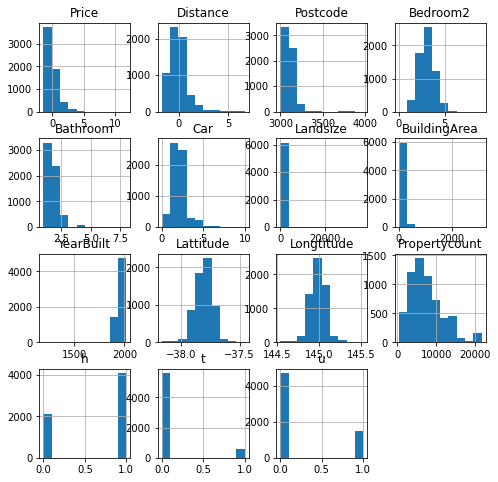

In [103]:
fig = plt.figure(figsize = (8,8)) 
ax = fig.gca() 
melb_data.hist(ax=ax) 
plt.show()

ROOMS VS Council Area Plot

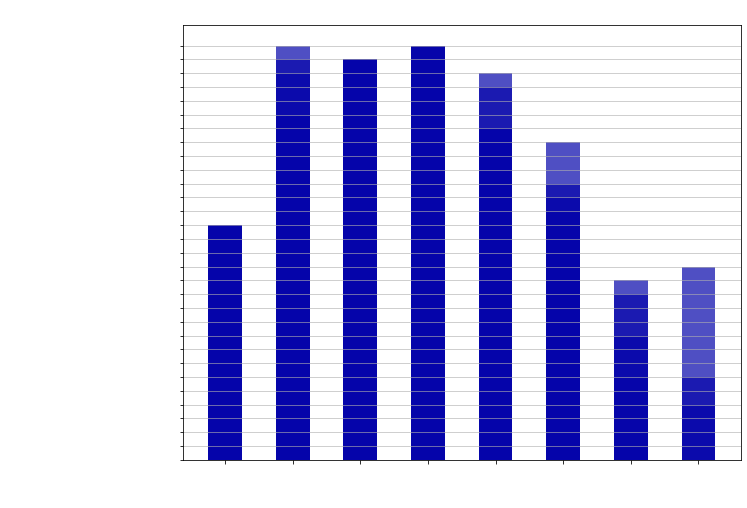

In [111]:
plt.figure(figsize=[10,8])

plt.bar(melb_data['Rooms'], melb_data['CouncilArea'], width = 0.5, color='#0504aa',alpha=0.7)
#plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Rooms',fontsize=15, color="white")
plt.ylabel('Council Area',fontsize=15, color="white")
plt.xticks(fontsize=15, color="white")
plt.yticks(fontsize=15, color="white")
plt.ylabel('Council Area',fontsize=15, color="white")
plt.title('Rooms vs Council Area',fontsize=15, color="white")

plt.show()

Frequency Histograms

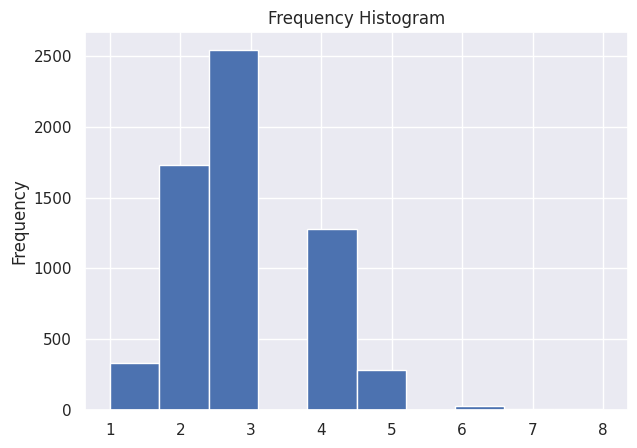

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = melb_data['Rooms']
plt.hist(x)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

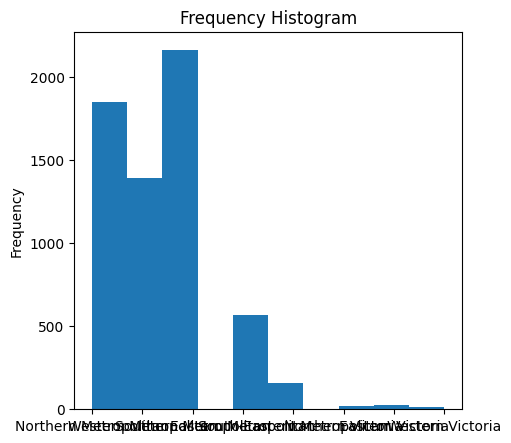

In [128]:
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})

# Plot Histogram on x
x = melb_data['Regionname']
plt.hist(x)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

Correlation Heatmap

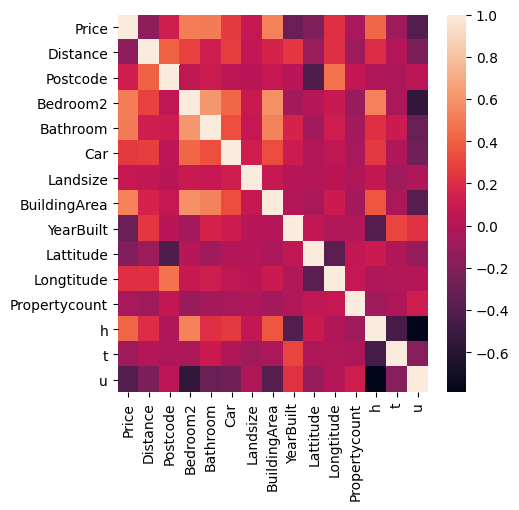

In [126]:
sns.heatmap(melb_data.corr())

Rooms vs Price Analysis through Scatter Plot

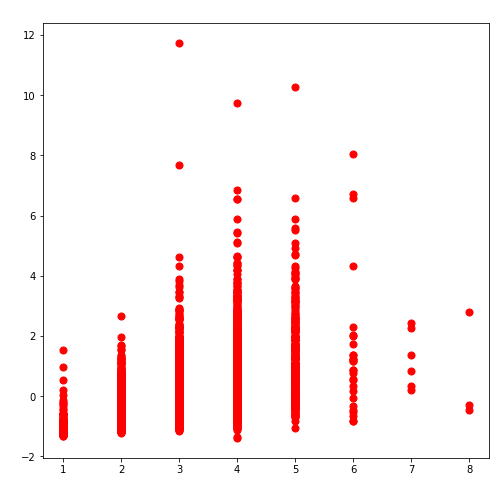

In [139]:
sns.reset_orig()
plt.figure(figsize = (8, 8))
plt.scatter(melb_data['Rooms'], melb_data['Price'], c = 'red', s=50)
plt.title('Relation between Rooms and Price', color="white")
plt.xlabel('Rooms',color="white")
plt.ylabel('Price (Scaled)',color="white")
plt.show()

Distance vs Price Analysis using Scatter Plot

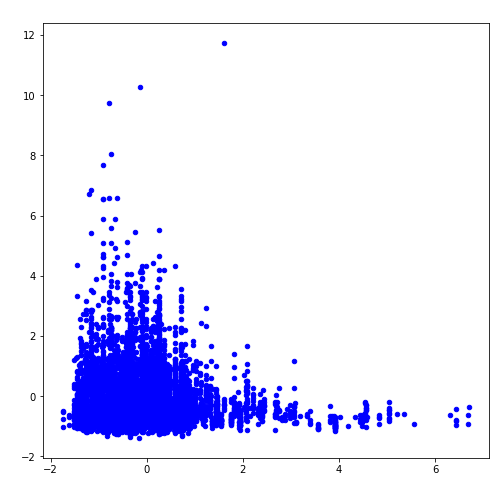

In [144]:
sns.reset_orig()
plt.figure(figsize = (8, 8))
plt.scatter(melb_data['Distance'], melb_data['Price'], c = 'blue', s=20)
plt.title('Relation between Distance and Price', color="white")
plt.xlabel('Distance (Scaled)', color="white")
plt.ylabel('Price (Scaled)', color="white")
plt.show()

Regression Analysis

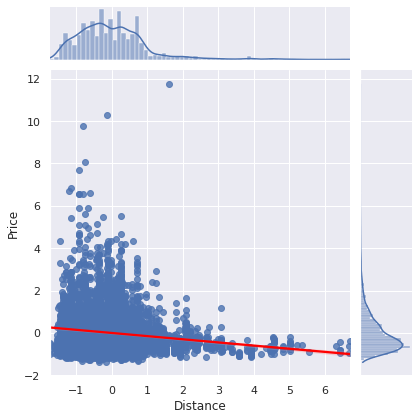

In [154]:
sns.set_theme(color_codes=True)
sns.jointplot(x="Distance", y="Price", data=melb_data, kind='reg',joint_kws={'line_kws':{'color':'red'}});

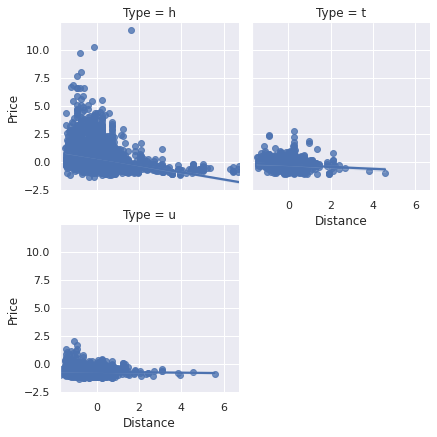

In [156]:
sns.lmplot(x="Distance", y="Price", col="Type", data=melb_data,
           col_wrap=2, height=3);